In [1]:
import re
import matplotlib.pyplot as plt
from elasticsearch import Elasticsearch

es = Elasticsearch("localhost:9200")

index_doc = {"index": "judgment", "doc_type": "doc"}

In [2]:
# Number of judges

print(es.count(**index_doc, body={"query":{"match_all": {}}})["count"])

44719


In [3]:
# 6
query = {
    "query": {
        "term": {
            "text_content" : "szkoda"
        }
    }
}

print(es.count(**index_doc, body=query)["count"])

14036


In [4]:
# 7
query = {
    "query": {
        "match_phrase" : {
            "text_content" : "trwały uszczerbek na zdrowiu"
        }
    }
}
print(es.count(**index_doc, body=query)["count"])

1124


In [5]:
# 8
query = {
    "query": {
        "match_phrase" : {
            "text_content" : {
                "query": "trwały uszczerbek na zdrowiu",
                "slop": 2
            }
        }
    }
}
print(es.count(**index_doc, body=query)["count"])

1236


In [6]:
# 9
query = {
    "size": 0,
    "aggs" : {
        "judges" : {
            "terms" : { 
                "field" : "judges",
                "size": 3
            }
        }
    }
}

res = es.search(**index_doc, body=query)
for bucket in res["aggregations"]["judges"]["buckets"]:
    print("{}: {}".format(bucket["key"], bucket["doc_count"]))

Radosław Olewczyński: 270
Zofia Szcześniewicz: 269
Jacek Kępa: 264


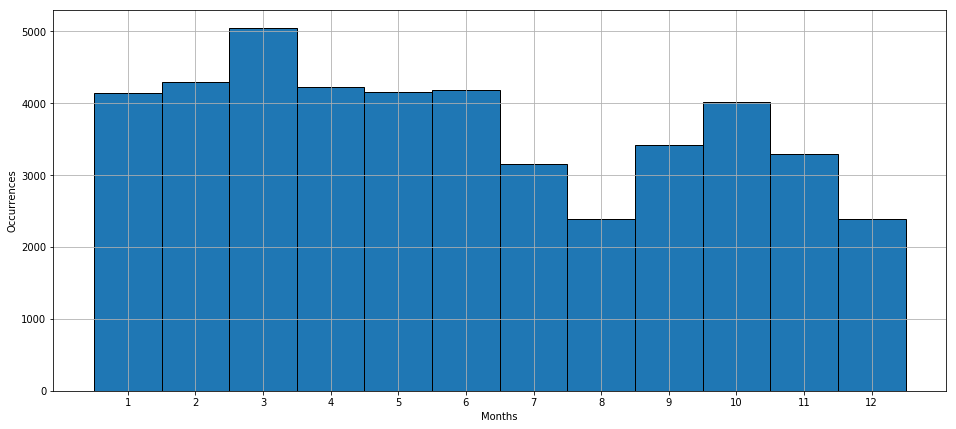

In [7]:
# 10
query = {
     "size":0,
     "aggs" : {
        "judgments_per_month" : {
            "date_histogram" : {
                "field" : "date",
                "interval" : "month"
            }
        }
    }
}

res = es.search(**index_doc, body=query)
buckets = res["aggregations"]["judgments_per_month"]["buckets"]

data = []
for bucket in buckets:
    month = int(re.match("2017-(\d\d)", bucket["key_as_string"])[1])
    data.extend([month] * bucket["doc_count"])

bins = [x for x in range(1, 14)]

plt.figure(figsize=(16, 7))
plt.hist(data, bins = bins, edgecolor="k", align='left')
plt.xlabel("Months")
plt.xticks(bins[:-1])
plt.ylabel("Occurrences")
plt.grid(True)
plt.show()